# Time Series Prediction


## Introduction

Predicting time series data is useful for a variety of business applications. Companies forecast time series data in order to forecast sales, manage their supply chains, and more.

LSTMs are commonly used for time series prediction because they are able to learn the underlying patterns of time series data. 

In this exercise, we will use an LSTM to forecast the data from a random timeseries by training it on the timeseries.

## Instructions

You can begin forecasting trends with LSTMs with the following steps:

1. Generate your timeseries data in Numpy
2. Load the data into PyTorch
3. Train your model on the data
4. Run the model to predict the next steps in the time series.

## Example Code

<b> Generate X, Y data </b>

In [1]:
# Create a sinusoidal dataset
import numpy as np
X = np.arange(100)
Y = np.array([np.sin(x/10) + 0.01*x for x in X])

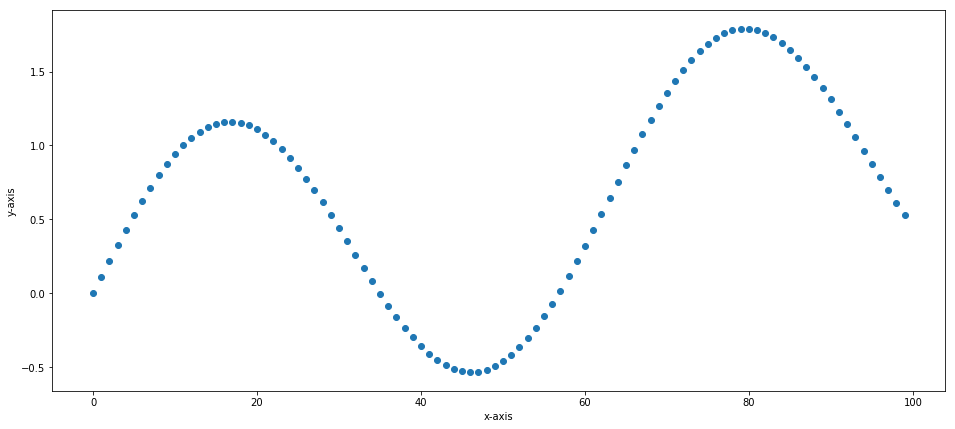

In [2]:
# Visualize graph
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[16, 7])
plt.scatter(X, Y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

<b> Create an LSTM Model </b>

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class LSTM(nn.Module):
    
    def __init__(self, hidden_size, seq_length):
        super(LSTM, self).__init__()
        
        self.seq_length = seq_length
        
        # define 1 LSTM cell which can be used multiple times in the forward method
        self.lstm = nn.LSTMCell(1, hidden_size)
        
        # to predict a specific value for the next time step, output size of the fc layer should be 1
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x, hidden, cell):
        
        for i in range(self.seq_length):
            
            hidden, cell = self.lstm(x[i].unsqueeze(0).unsqueeze(0), (hidden, cell))
            
        output = self.fc(hidden)
        
        return output

In [5]:
test_hidden_size = 32
test_seq_length = 10

# test that the dimensions are as expected
test_lstm = LSTM(hidden_size=test_hidden_size, seq_length=test_seq_length)

# generate test data points and convert to Tensors
test_time_steps = np.arange(test_seq_length+1)
test_data = np.array([np.sin(x/10) + 0.01*x for x in test_time_steps])
data_tensor = torch.Tensor(test_data)
test_input = data_tensor[:-1]
test_target = data_tensor[-1].unsqueeze(0).unsqueeze(0)
print('Target: ', test_target)
print('Target size: ', test_target.size())

# initialize cell state and hidden state
test_init_hidden = torch.zeros(1, test_hidden_size)
test_init_cell = torch.zeros(1, test_hidden_size)

# test lstm sizes
test_out = test_lstm(test_input, test_init_hidden, test_init_cell)
print('Output: ', test_out)
print('Output size: ', test_out.size())

Target:  tensor([[ 0.9415]])
Target size:  torch.Size([1, 1])
Output:  tensor([[ 0.1596]])
Output size:  torch.Size([1, 1])


In [6]:
# train the LSTM
def train(lstm, n_steps, hidden_size, seq_length, print_every):

    # initialize hidden and cell state
    hidden = None
    cell = None
    
    for i in range(n_steps):
        
        # define training data and convert to Tensors
        time_steps = np.arange(i, i+seq_length+1)
        data = np.array([np.sin(x/10) + 0.01*x for x in time_steps])
        data_tensor = torch.Tensor(data)
        x_tensor = data_tensor[:-1]
        y_tensor = data_tensor[-1].unsqueeze(0).unsqueeze(0)
        
        # initialize cell state and hidden state
        init_hidden = torch.zeros(1, hidden_size)
        init_cell = torch.zeros(1, hidden_size)
        
        # get output from lstm
        prediction = lstm(x_tensor, init_hidden, init_cell)
        
        # calculate loss
        loss = criterion(prediction, y_tensor)
        
        # zero out gradients
        optimizer.zero_grad()
        
        # perform backprop and update weights 
        loss.backward()
        optimizer.step()
        
        # display loss and predictions
        if i % print_every == 0:        
            print('Loss: ', loss.item())
            plt.plot(time_steps[:-1], x_tensor.data.numpy(), 'r.') # input
            plt.plot(time_steps[-1], prediction.data.numpy().flatten(), 'b.') # predictions
            plt.show()
    
    return lstm

Loss:  1.7849774360656738


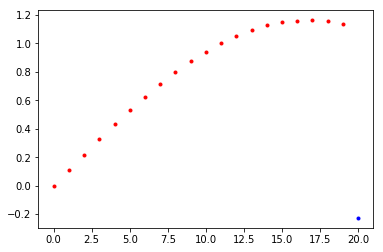

Loss:  1.3891818523406982


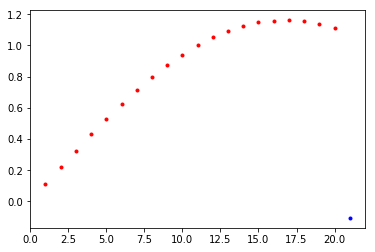

Loss:  1.03773832321167


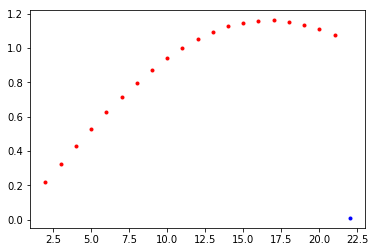

Loss:  0.6908252835273743


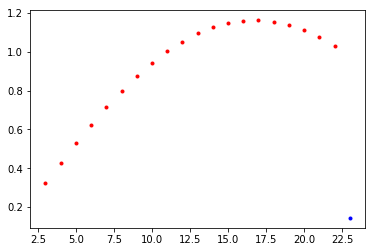

Loss:  0.34326672554016113


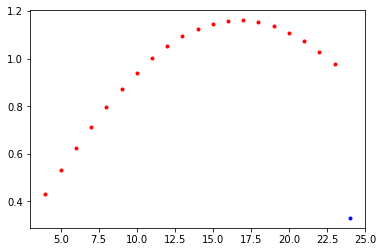

Loss:  0.056322284042835236


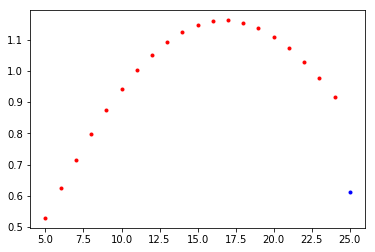

Loss:  0.05972397327423096


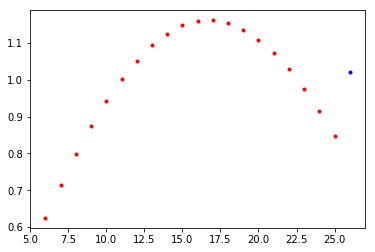

Loss:  0.2189849466085434


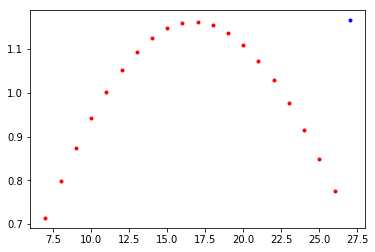

Loss:  0.23710274696350098


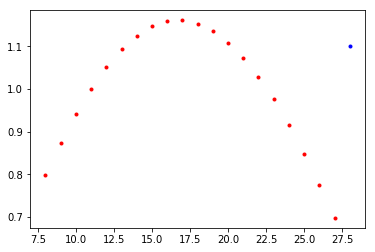

Loss:  0.18602055311203003


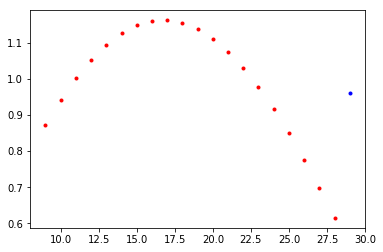

In [8]:
# decide hyperparameters
hidden_size = 32
seq_length = 20

# initiate a LSTM
lstm = LSTM(hidden_size, seq_length)

# define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.01)

# train the LSTM and monitor results
n_steps = 10
print_every = 1

trained_rnn = train(lstm, n_steps, hidden_size, seq_length, print_every)